<a href="https://colab.research.google.com/github/mohammad-zoubi/Generative_modelling_for_melanoma_detection/blob/main/data_analysis/EDA_SAM_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

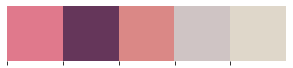

In [ ]:
# Regular Imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from tabulate import tabulate
import missingno as msno 
from IPython.display import display_html
from PIL import Image
import gc
import cv2

from skimage.transform import resize

# SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

# Set Color Palettes for the notebook
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

In [ ]:
!cd /content/drive/MyDrive/images_metadata/

In [ ]:
# Directory
directory = '/content/drive/MyDrive/images_metadata'

# Import the 2 csv s
train_df = pd.read_csv(directory + '/melanoma_SAM_data.csv')
# test_df = pd.read_csv(directory + '/test.csv')

print('Train data has {:,} rows.'.format(len(train_df)))

# Change columns names
new_names = ['age',	'sex',	'invasiv in.situ',	'Lesion.id',	'filnamn',	'EXKL',	'anatomy',	'MM Exakt Breslow',	'MM Breslow']
# new_names = ['dcm_name', 'ID', 'sex', 'age', 'anatomy', 'diagnosis', 'benign_malignant', 'target']
train_df.columns = new_names

Train data has 1,315 rows.


In [ ]:
df1_styler = train_df.head().style.set_table_attributes("style='display:inline'").set_caption('Head Train Data')
display_html(df1_styler._repr_html_(), raw=True)

,age,sex,invasiv in.situ,Lesion.id,filnamn,EXKL,anatomy,MM Exakt Breslow,MM Breslow
0,57,M,in situ,1,0001_derm_01,,5=Trunk,nan,
1,61,K,inv,3,0003_derm_01,,6=Upper extremities,0.500000,0.1-0.5
2,47,M,inv,4,0004_derm_01,,5=Trunk,0.700000,0.6-0.8
3,70,M,in situ,5,0005_derm_01,,5=Trunk,nan,
4,91,M,inv,6,0006_derm_01,,3=Face & neck,0.200000,0.1-0.5


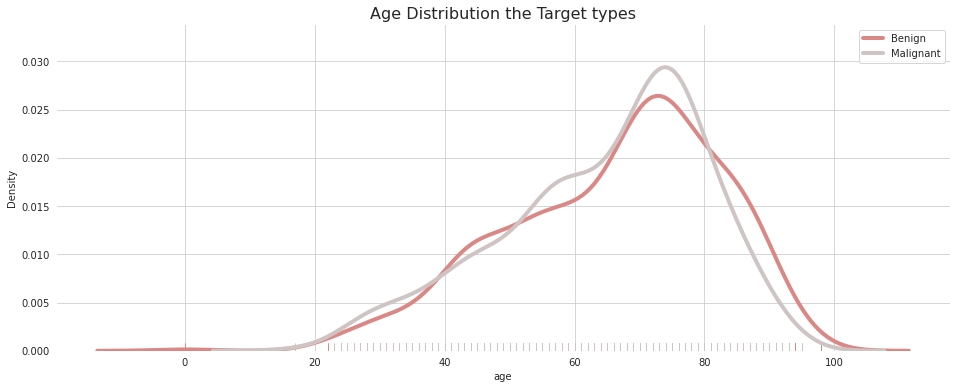

In [ ]:
# Figure
f, (ax2) = plt.subplots(1, 1, figsize = (16, 6))

b = sns.distplot(a = train_df[train_df['invasiv in.situ']=='inv']['age'], ax=ax2, color=colors_nude[2], 
                 hist=False, rug=True, kde_kws=dict(linewidth=4), label='Benign')
c = sns.distplot(a = train_df[train_df['invasiv in.situ']=='in situ']['age'], ax=ax2, color=colors_nude[3], 
                 hist=False, rug=True, kde_kws=dict(linewidth=4), label='Malignant')

    
ax2.set_title('Age Distribution the Target types', fontsize=16)
ax2.legend()
sns.despine(left=True, bottom=True);

Text(0.5, 1.0, 'Train Missing Values Map')

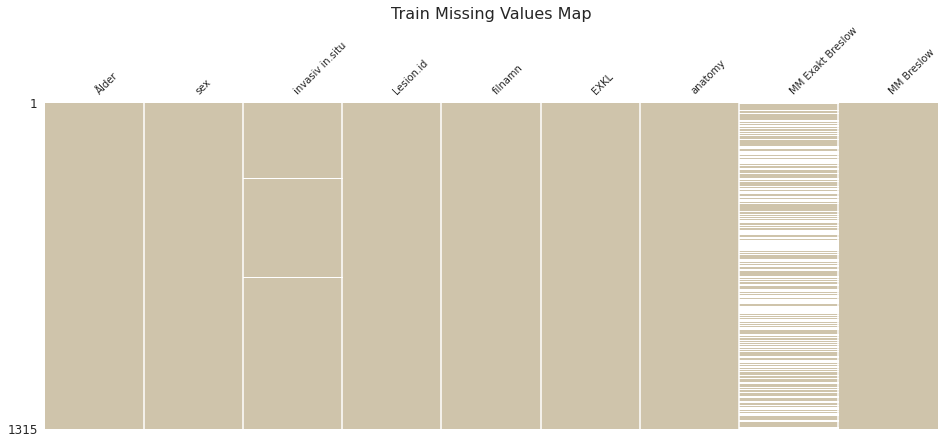

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize = (16, 6))

msno.matrix(train_df, ax = ax1, color=(207/255, 196/255, 171/255), fontsize=10)

ax1.set_title('Train Missing Values Map', fontsize = 16)
#Breslow: the measurement of the depth of the melanoma from the surface of your skin
# down through to the deepest point of the tumour

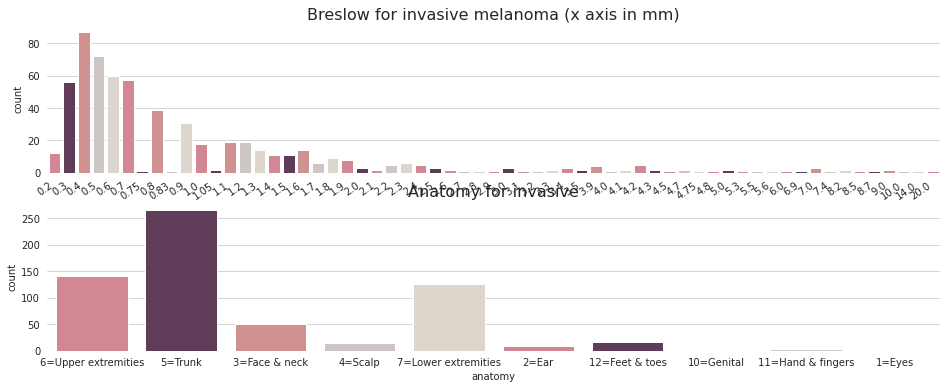

In [ ]:
# Data
nan_depth = train_df[train_df['MM Exakt Breslow'].isna() == True]
has_depth = train_df[train_df['MM Exakt Breslow'].isna() == False]

# Figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 6))

a = sns.countplot(has_depth['MM Exakt Breslow'], ax = ax1, palette=colors_nude)
b = sns.countplot(has_depth['anatomy'], ax = ax2, palette=colors_nude)

ax1.set_title('Breslow for invasive melanoma (x axis in mm)', fontsize=16)
ax2.set_title('Anatomy for invasive', fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);


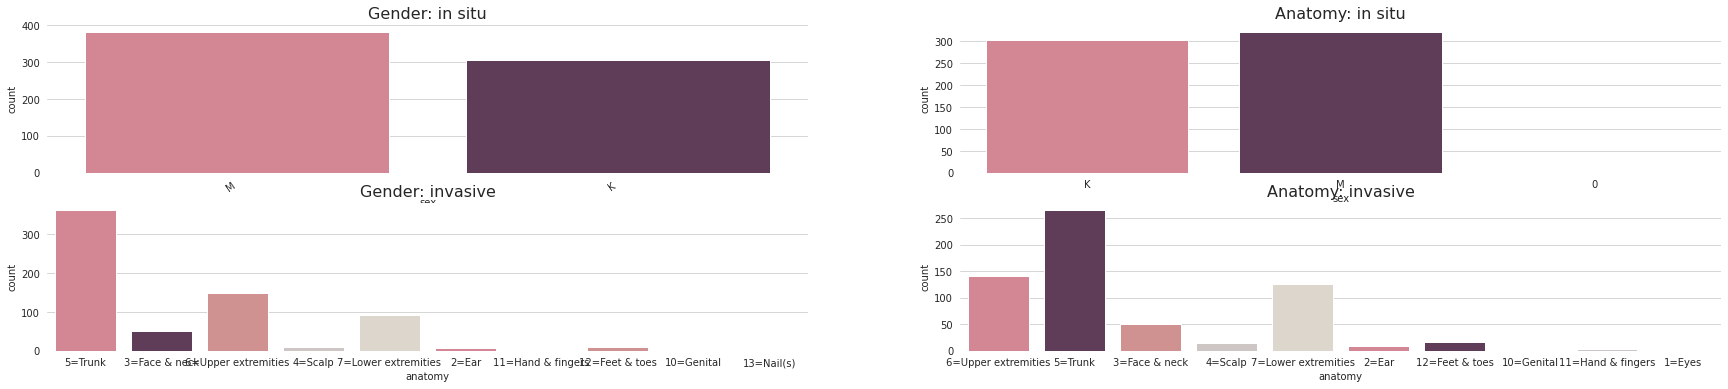

In [ ]:

# Figure
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (30, 6))

a = sns.countplot(nan_depth['sex'], ax = ax1, palette=colors_nude)
b = sns.countplot(has_depth['sex'], ax = ax2, palette=colors_nude)
c = sns.countplot(nan_depth['anatomy'], ax = ax3, palette=colors_nude)
d = sns.countplot(has_depth['anatomy'], ax = ax4, palette=colors_nude)

ax1.set_title('Gender: in situ', fontsize=16)
ax2.set_title('Anatomy: in situ', fontsize=16)

ax3.set_title('Gender: invasive', fontsize=16)
ax4.set_title('Anatomy: invasive', fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);


Out of 1315 rows 1312 has diagnosis, 638 are benign and 629 malignant.


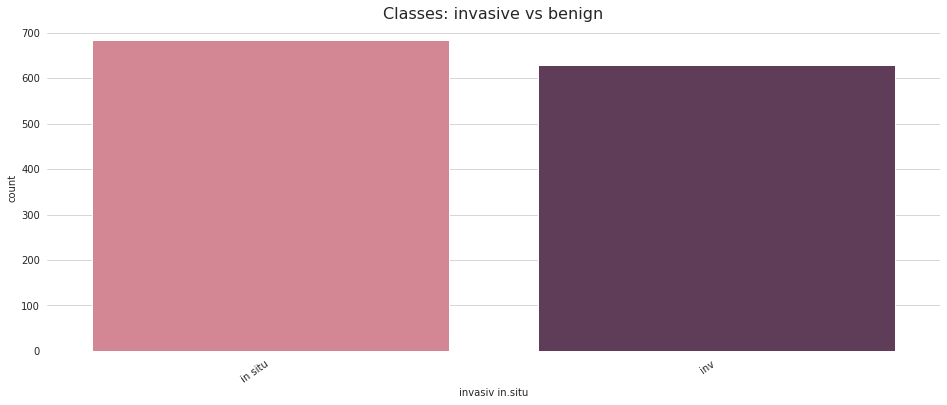

In [ ]:
# Data
nan_diag = train_df[train_df['invasiv in.situ'].isna() == True]
has_diag = train_df[train_df['invasiv in.situ'].isna() == False]

# Figure
f, (ax1) = plt.subplots(1, 1, figsize = (16, 6))

a = sns.countplot(has_diag['invasiv in.situ'], ax = ax1, palette=colors_nude)
# b = sns.countplot(has_diag['anatomy'], ax = ax2, palette=colors_nude)

ax1.set_title('Classes: invasive vs benign', fontsize=16)
# ax2.set_title('Anatomy for invasive', fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

# Benign/ Malignant check
print('Out of 1315 rows 1312 has diagnosis, 638 are benign and 629 malignant.')
